In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
# from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #Use for testing for now
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.dates as mdates


In [460]:
loanFraud_dataset = pd.read_csv('account_data.csv')
creditcard_dataset = pd.read_csv('BankChurners.csv')

In [461]:
loanFraud_dataset.head(5)

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [462]:
creditcard_dataset.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [463]:
loanFraud_dataset = loanFraud_dataset.dropna()
creditcard_dataset = creditcard_dataset.dropna()

In [464]:
loanFraud_dataset.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

In [465]:
creditcard_dataset.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [466]:
creditcard_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
creditcard_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


In [467]:
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [468]:
loanFraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

<h1>INSERT YOUR DATA VISUALIZATION CODES ABOVE DATA TRANSFORMATION CODE</h1>

In [469]:
#Data Transformation for the account dataset

categorical_columns = loanFraud_dataset.select_dtypes(include=['object']).columns
exclude_column = 'TimeofTransaction'
categorical_columns = categorical_columns[categorical_columns != exclude_column]

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    loanFraud_dataset[column] = label_encoder.fit_transform(loanFraud_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Occupation:
Accountant -> 0
Architect -> 1
Artist -> 2
Chef -> 3
Clerk -> 4
Designer -> 5
Doctor -> 6
Engineer -> 7
Entrepreneur -> 8
Lawyer -> 9
Manager -> 10
Musician -> 11
Retired -> 12
Self-employed -> 13
Software Developer -> 14
Student -> 15
Teacher -> 16
Technician -> 17
Unemployed -> 18

Mappings for MaritalStatus:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for ResidentialStatus:
Live with Parents -> 0
Own -> 1
Rent -> 2

Mappings for PurposeoftheLoan:
auto -> 0
education -> 1
home -> 2
medical -> 3
personal -> 4
travel -> 5

Mappings for Collateral:
No -> 0
Yes -> 1

Mappings for ApplicationBehavior:
Normal -> 0
Rapid -> 1

Mappings for LocationofApplication:
Local -> 0
Unusual -> 1

Mappings for ChangeinBehavior:
No -> 0
Yes -> 1

Mappings for AccountActivity:
Normal -> 0
Unusual -> 1

Mappings for PaymentBehavior:
Defaulted -> 0
Late -> 1
On-time -> 2

Mappings for Blacklists:
No -> 0
Yes -> 1

Mappings for EmploymentVerification:
Not Verified -> 0
Verifi

<h5>One hot encoding code</h5>

In [470]:
# # Select categorical columns excluding 'TimeofTransaction' --> Too much fields to consider
# categorical_columns = loanFraud_dataset.select_dtypes(include=['object']).columns
# exclude_column = 'TimeofTransaction'
# categorical_columns = categorical_columns[categorical_columns != exclude_column]

# # Transform categorical columns
# one_hot_encoders = {}
# encoded_dfs = []

# for column in categorical_columns:
#     one_hot_encoder = OneHotEncoder(sparse=False, dtype=int)
#     transformed = one_hot_encoder.fit_transform(loanFraud_dataset[[column]])
    
#     # Store the encoder
#     one_hot_encoders[column] = one_hot_encoder
    
#     # Create a DataFrame for the encoded values
#     encoded_df = pd.DataFrame(
#         transformed,
#         columns=[f"{column}_{category}" for category in one_hot_encoder.categories_[0]]
#     )
#     encoded_dfs.append(encoded_df)

# # Combine the original dataset with the encoded columns
# loanFraud_dataset = pd.concat([loanFraud_dataset.drop(columns=categorical_columns), *encoded_dfs], axis=1)

# # Display mappings
# for column, encoder in one_hot_encoders.items():
#     print(f"\nMappings for {column}:")
#     for original_value, encoded_value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
#         print(f"{original_value} -> One-hot encoded as {encoded_value}")

In [471]:
#Data Transformation for the churn dataset

categorical_columns = creditcard_dataset.select_dtypes(include=['object']).columns

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    creditcard_dataset[column] = label_encoder.fit_transform(creditcard_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Attrition_Flag:
Attrited Customer -> 0
Existing Customer -> 1

Mappings for Gender:
F -> 0
M -> 1

Mappings for Education_Level:
College -> 0
Doctorate -> 1
Graduate -> 2
High School -> 3
Post-Graduate -> 4
Uneducated -> 5
Unknown -> 6

Mappings for Marital_Status:
Divorced -> 0
Married -> 1
Single -> 2
Unknown -> 3

Mappings for Income_Category:
$120K + -> 0
$40K - $60K -> 1
$60K - $80K -> 2
$80K - $120K -> 3
Less than $40K -> 4
Unknown -> 5

Mappings for Card_Category:
Blue -> 0
Gold -> 1
Platinum -> 2
Silver -> 3


In [472]:
#Inspect individual column's value transformation (This is to print the transformed value and original value)

# specified_column = 'Cooking_With'

# if specified_column in label_encoders:
#     print(f"Mappings for {specified_column}:")
#     encoder = label_encoders[specified_column]
#     for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
#         print(f"{original_value} -> {encoded_value}")
# else:
#     print(f"The column '{specified_column}' was not found or is not a categorical column.")

In [473]:
loanFraud_dataset['TimeofTransaction'] = pd.to_datetime(loanFraud_dataset['TimeofTransaction'])
loanFraud_dataset.set_index('TimeofTransaction', inplace=True)  # Set as index for time series analysis


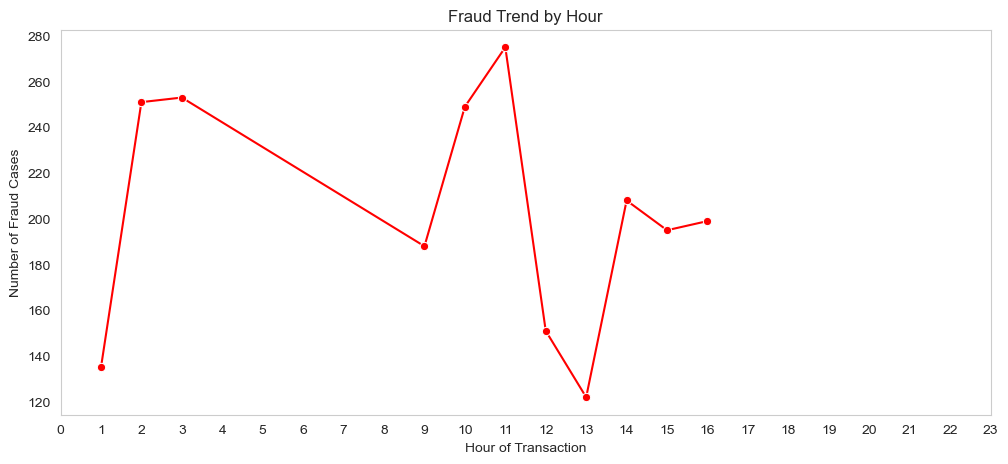

In [474]:
# Extract transaction hour
loanFraud_dataset['TransactionHour'] = loanFraud_dataset.index.hour  

# Count fraud cases per hour
fraud_by_hour = loanFraud_dataset.groupby('TransactionHour')['IsFraud'].sum()

# Plot fraud trend by hour
plt.figure(figsize=(12,5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='red')
plt.xlabel("Hour of Transaction")
plt.ylabel("Number of Fraud Cases")
plt.title("Fraud Trend by Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#Dataset only consist of records from a timing of 1am to 4pm

In [475]:
loanFraud_dataset['DummyDate'] = pd.date_range(start='2024-01-01', periods=len(loanFraud_dataset), freq='H')
loanFraud_dataset.set_index('DummyDate', inplace=True)


In [476]:
# Aggregate fraud cases per hour
fraud_trend = loanFraud_dataset.resample('D')['IsFraud'].sum()

auto_arima_model = auto_arima(fraud_trend, seasonal=False, trace=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2637.979, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2027.054, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2378.247, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1912.375, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1878.236, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1871.219, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1850.125, Time=0.14 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1776.947, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1775.519, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1776.621, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1777.184, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1776.2

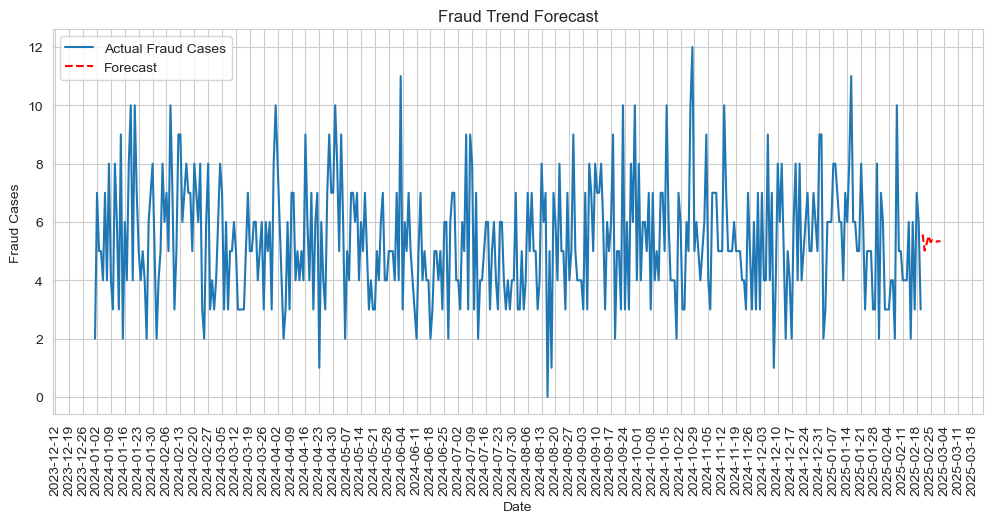

In [477]:
# Fit ARIMA Model
model = ARIMA(fraud_trend, order=(4,0,0))  # (p,d,q) values need tuning
model_fit = model.fit()

# Predict next 7 days
forecast = model_fit.forecast(steps=10)



# Plot the results
plt.figure(figsize=(12,5))
plt.plot(fraud_trend, label="Actual Fraud Cases")
plt.plot(fraud_trend.index[-1] + pd.to_timedelta(range(1,11), unit='D'), forecast, label="Forecast", linestyle="dashed", color="red")

# Formatting x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as YYYY-MM-DD
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.xlabel("Date")
plt.ylabel("Fraud Cases")
plt.title("Fraud Trend Forecast")
plt.legend()
plt.show()



In [478]:
loanFraud_dataset.head()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TransactionHour
DummyDate,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,56,16,0,4,1,1,827,52033,300000,25,...,2,0,1,0,3,1,0,1,0,10
2024-01-01 01:00:00,40,7,2,0,2,1,830,42893,8105,3,...,2,0,1,0,1,0,0,0,0,16
2024-01-01 02:00:00,25,4,1,0,0,360,809,141233,75734,19,...,2,1,1,0,1,0,0,1,0,3
2024-01-01 03:00:00,34,18,2,0,2,92,630,9217,2000,1,...,0,0,0,1,2,0,1,0,1,16
2024-01-01 04:00:00,47,14,2,0,2,26,733,47979,67767,1,...,2,0,1,0,1,0,0,0,0,12


In [479]:
loanFraud_dataset.columns

Index(['Age', 'Occupation', 'MaritalStatus', 'Dependents', 'ResidentialStatus',
       'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested',
       'LoanTerm', 'PurposeoftheLoan', 'Collateral', 'InterestRate',
       'PreviousLoans', 'ExistingLiabilities', 'ApplicationBehavior',
       'LocationofApplication', 'ChangeinBehavior', 'AccountActivity',
       'PaymentBehavior', 'Blacklists', 'EmploymentVerification',
       'PastFinancialMalpractices', 'DeviceInformation',
       'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud',
       'TransactionHour'],
      dtype='object')

In [480]:
# # Convert the 'TimeofTransaction' column values to integers --> KIV this
# loanFraud_dataset.replace({'TimeofTransaction': {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}}, inplace=True)
# loanFraud_dataset['TimeofTransaction'] = loanFraud_dataset['TimeofTransaction'].astype(int)

# loanFraud_dataset.info()
loanFraud_dataset['TransactionHour'] = loanFraud_dataset['TransactionHour'].astype(str) + ':00'
loanFraud_dataset['TransactionHour'] = pd.to_datetime(loanFraud_dataset['TransactionHour'], format='%H:%M')

# Define a function to categorize the time
def categorize_time(hour):
    if 5 <= hour < 12:  # Morning
        return 1
    elif 12 <= hour < 18:  # Afternoon
        return 2
    elif 18 <= hour < 22:  # Evening
        return 3
    else:  # Night
        return 4

# Apply the function to categorize times
loanFraud_dataset['TimeCategory'] = loanFraud_dataset['TransactionHour'].dt.hour.apply(categorize_time)
loanFraud_dataset.drop(['TransactionHour'], axis=1, inplace=True)
loanFraud_dataset.head()


,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TimeCategory
DummyDate,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,56,16,0,4,1,1,827,52033,300000,25,...,2,0,1,0,3,1,0,1,0,1
2024-01-01 01:00:00,40,7,2,0,2,1,830,42893,8105,3,...,2,0,1,0,1,0,0,0,0,2
2024-01-01 02:00:00,25,4,1,0,0,360,809,141233,75734,19,...,2,1,1,0,1,0,0,1,0,4
2024-01-01 03:00:00,34,18,2,0,2,92,630,9217,2000,1,...,0,0,0,1,2,0,1,0,1,2
2024-01-01 04:00:00,47,14,2,0,2,26,733,47979,67767,1,...,2,0,1,0,1,0,0,0,0,2


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'MaritalStatus'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'ResidentialStatus'}>],
       [<Axes: title={'center': 'AddressDuration'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'IncomeLevel'}>,
        <Axes: title={'center': 'LoanAmountRequested'}>,
        <Axes: title={'center': 'LoanTerm'}>],
       [<Axes: title={'center': 'PurposeoftheLoan'}>,
        <Axes: title={'center': 'Collateral'}>,
        <Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'PreviousLoans'}>,
        <Axes: title={'center': 'ExistingLiabilities'}>],
       [<Axes: title={'center': 'ApplicationBehavior'}>,
        <Axes: title={'center': 'LocationofApplication'}>,
        <Axes: title={'center': 'ChangeinBehavior'}>,
        <Axes: title={'center': 'AccountActivity'}>,
        <Axes: ti

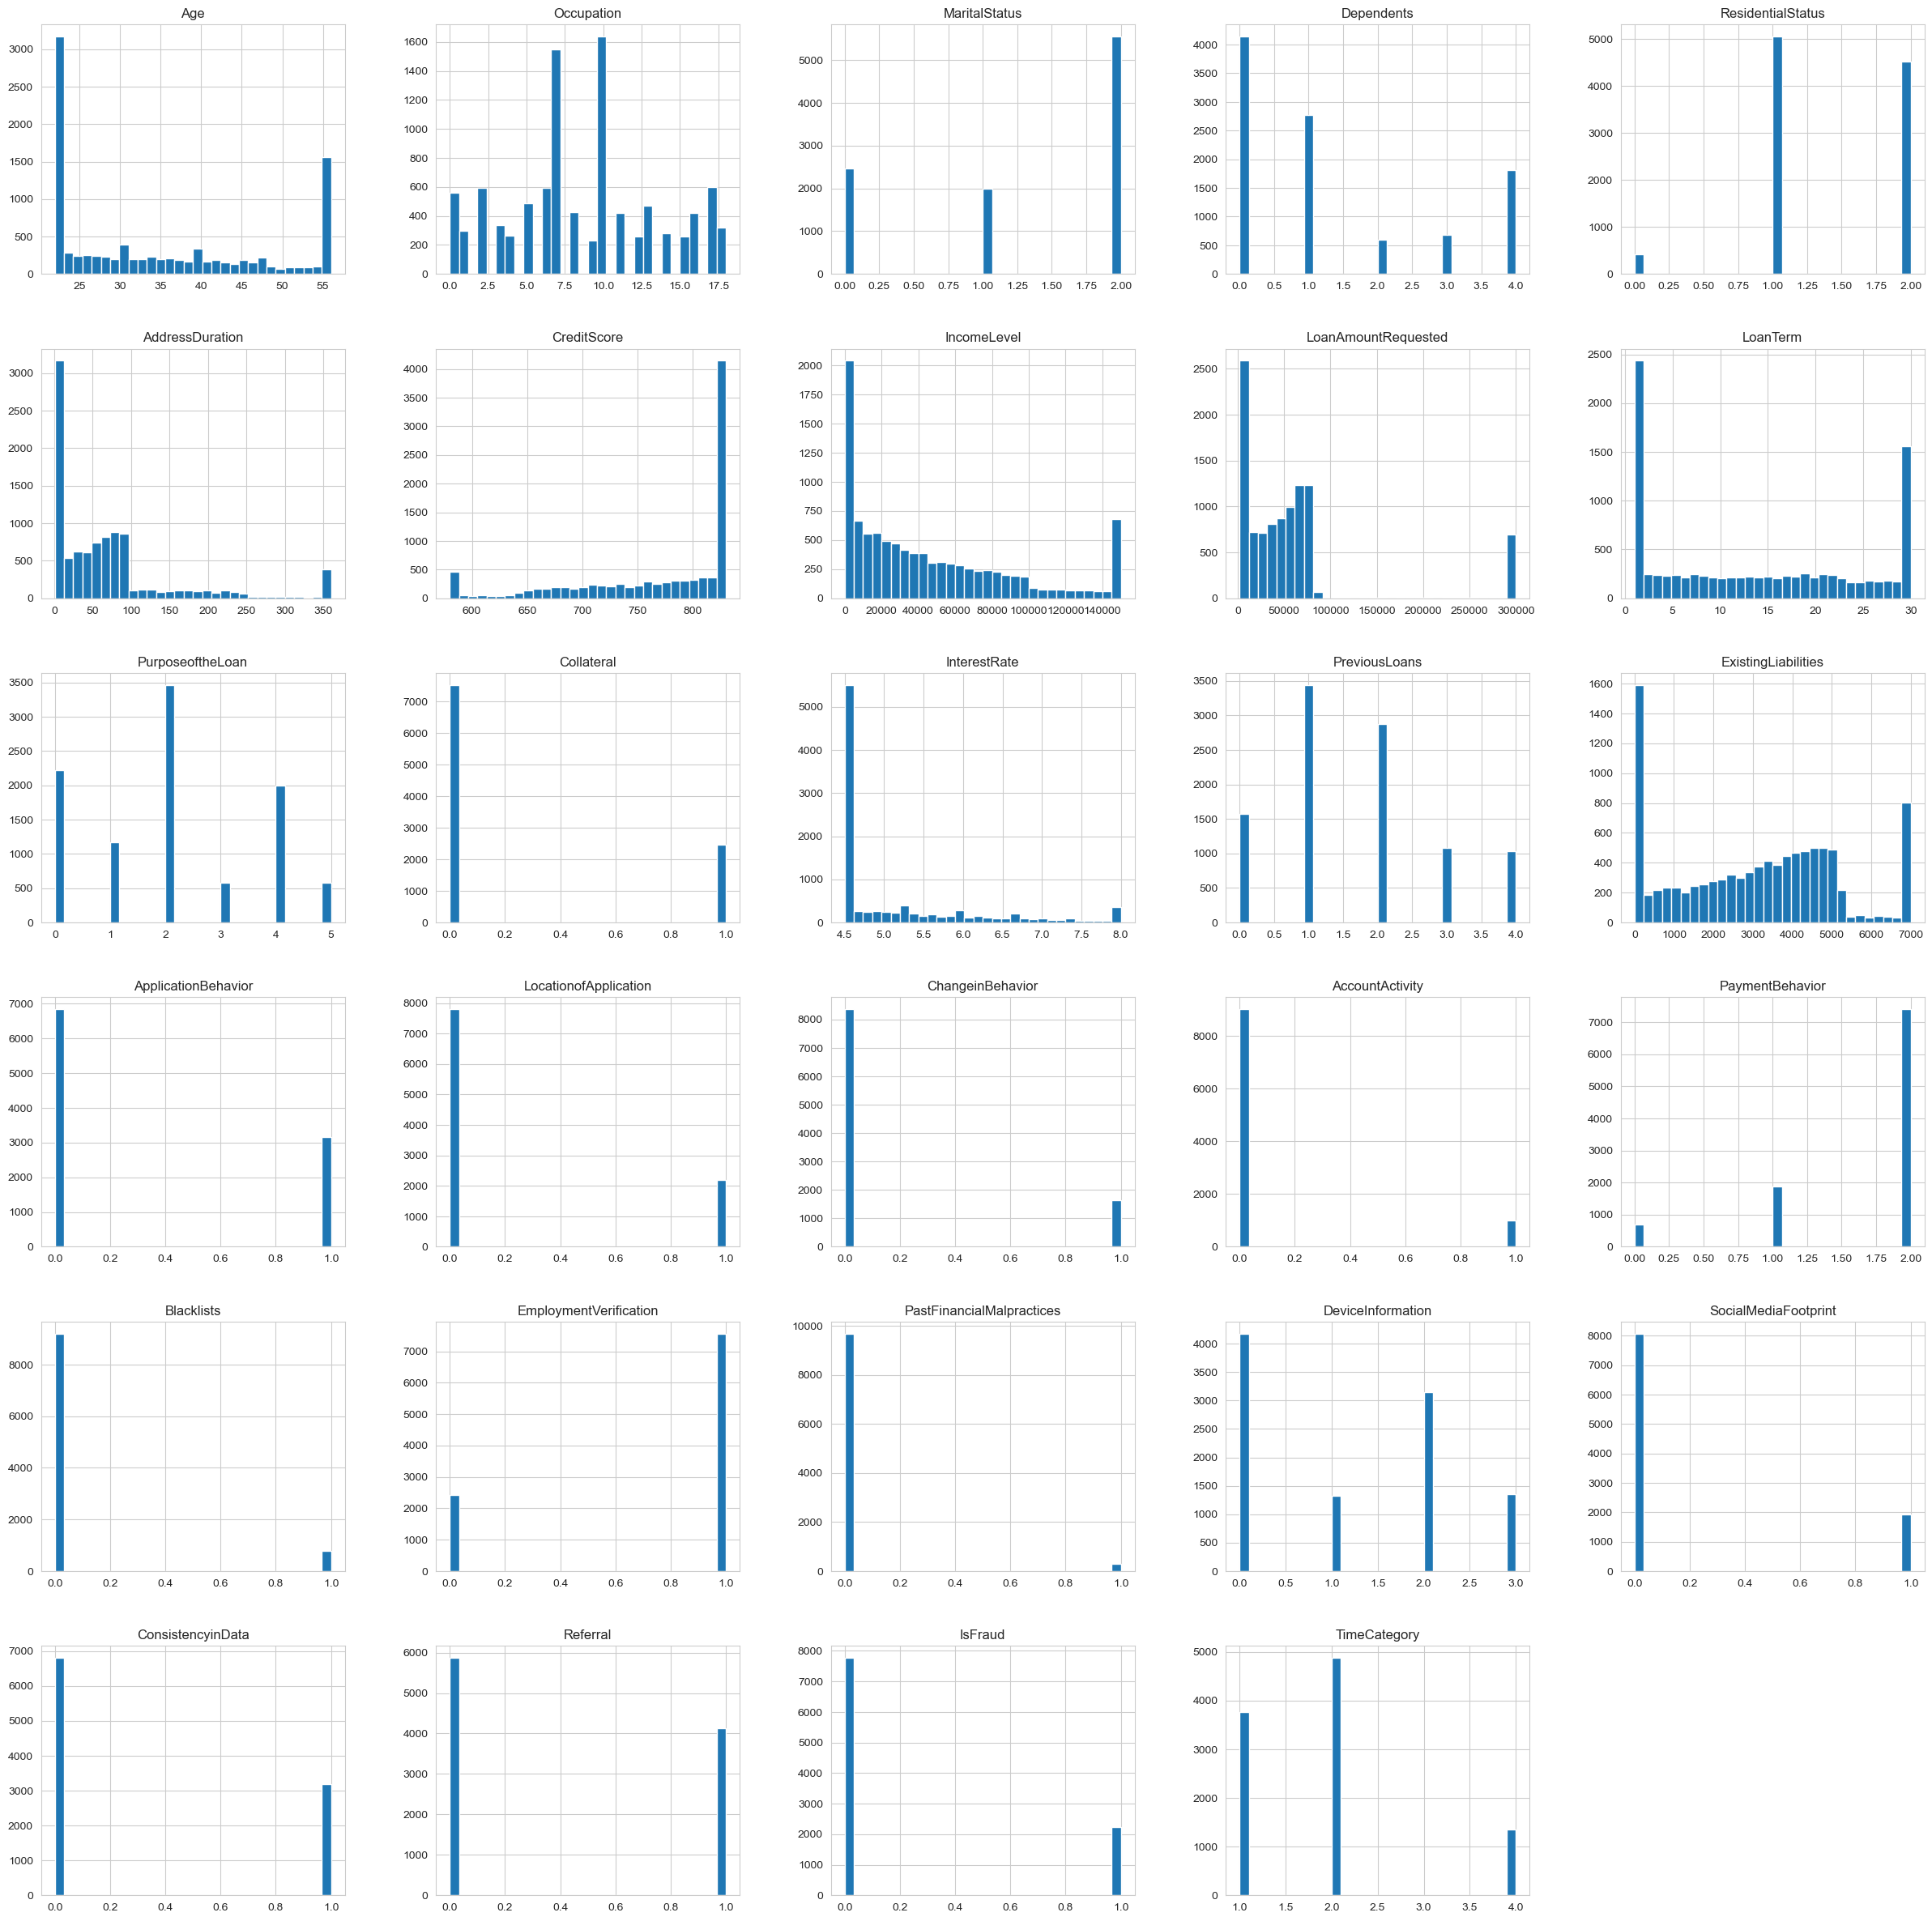

In [481]:
loanFraud_dataset.hist(bins=30, figsize=(30, 30))

In [482]:
loanFraud_dataset.describe()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TimeCategory
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.837900,8.652700,1.309400,1.323400,1.411300,69.087400,768.701300,45994.615600,57218.915600,13.847700,...,1.669700,0.079000,0.756700,0.030700,1.166700,0.192000,0.319300,0.412800,0.222600,1.893500
std,12.631048,4.948225,0.839727,1.506399,0.570232,84.854114,74.280933,44648.184654,72897.716564,10.923508,...,0.602028,0.269752,0.429096,0.172512,1.115632,0.393893,0.466229,0.492362,0.416013,0.952076
min,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,580.000000,0.000000,2000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,5.000000,1.000000,0.000000,1.000000,1.000000,721.000000,8277.500000,10555.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,31.000000,8.000000,2.000000,1.000000,1.000000,50.000000,801.000000,32791.000000,44008.500000,13.000000,...,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,45.000000,12.000000,2.000000,2.000000,2.000000,86.000000,830.000000,71698.000000,68073.750000,24.000000,...,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,56.000000,18.000000,2.000000,4.000000,2.000000,360.000000,830.000000,150000.000000,300000.000000,30.000000,...,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000


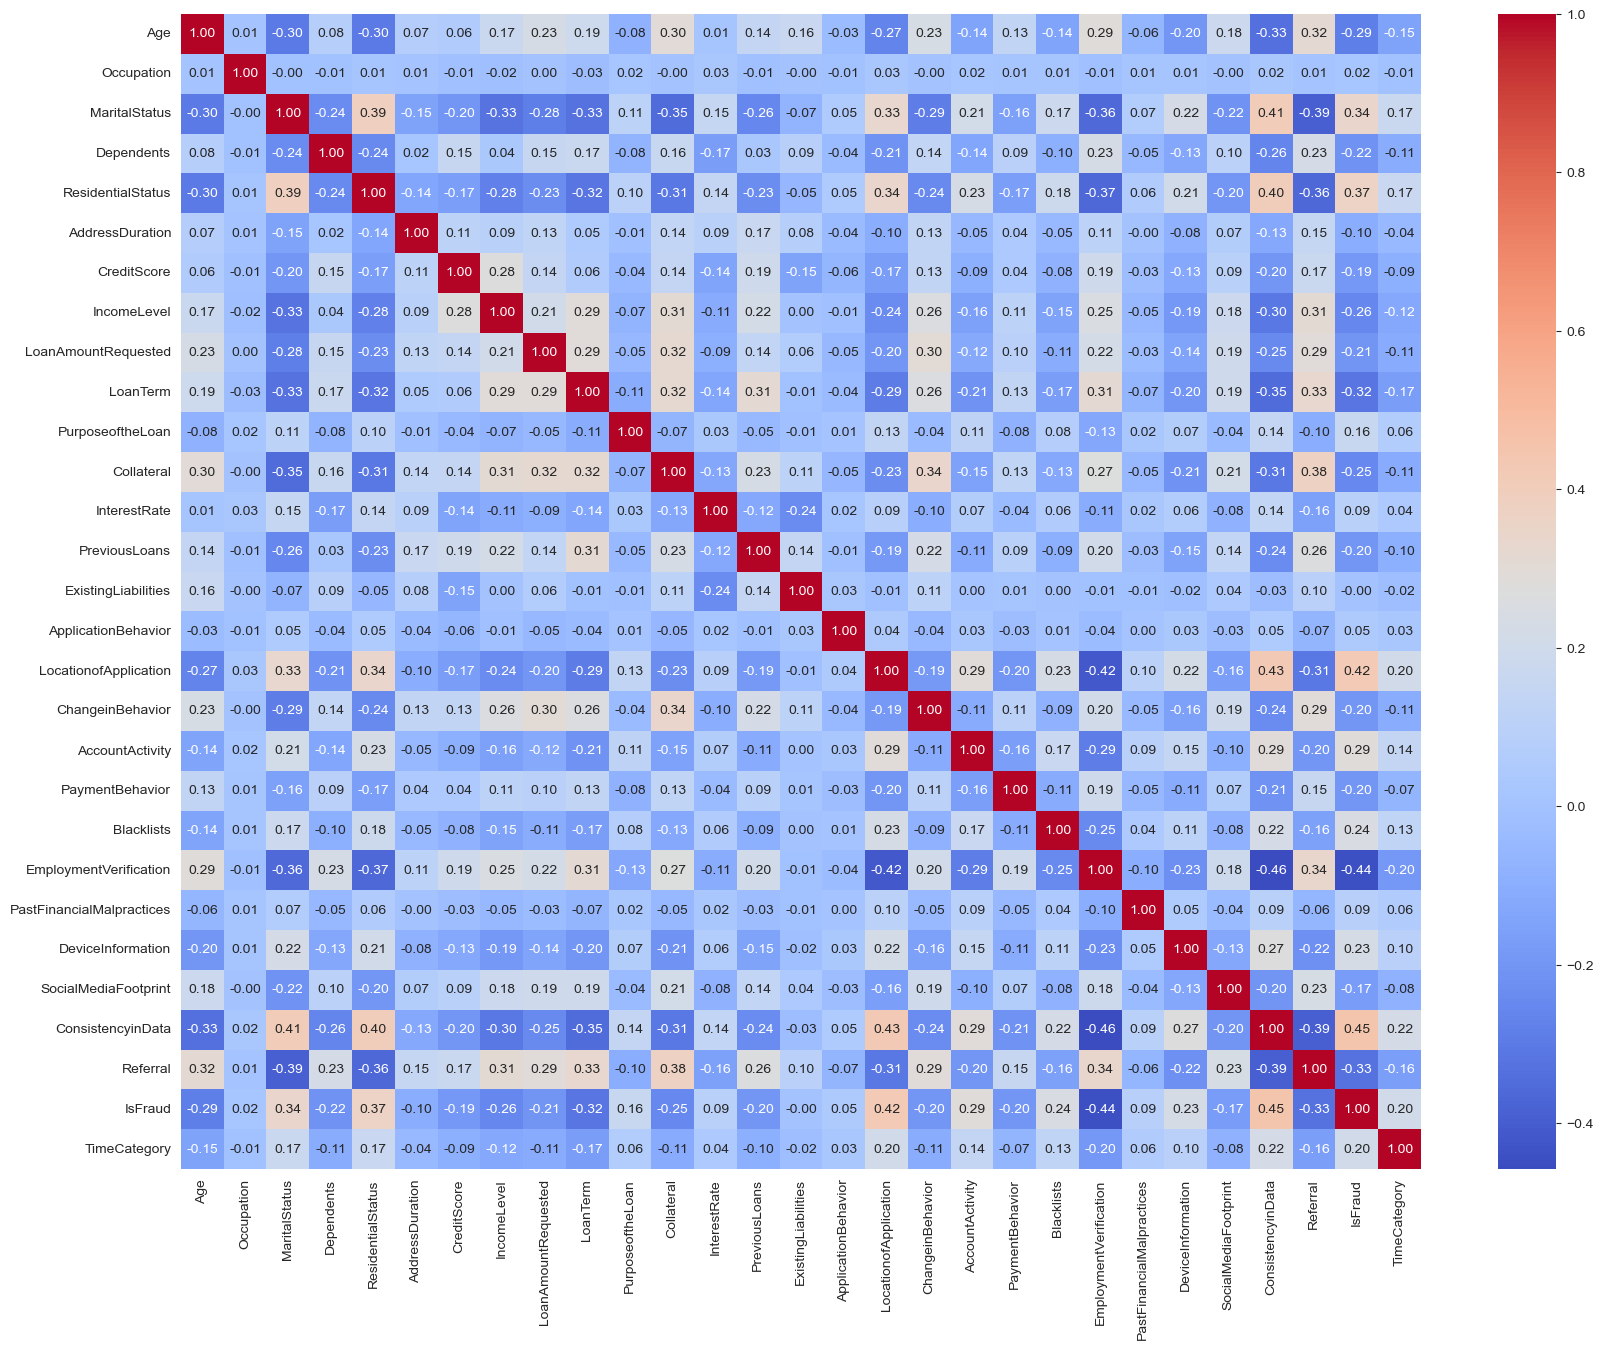

In [483]:
plt.figure(figsize=(20, 15))
sns.heatmap(loanFraud_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# columns_to_retain = ['LoanAmountRequested', 'LoanTerm', 'ExistingLiabilities', 'PreviousLoans', 'Dependents', 'Occupation', 'IncomeLevel', 'ResidentialStatus', 'CreditScore', 'IsFraud']

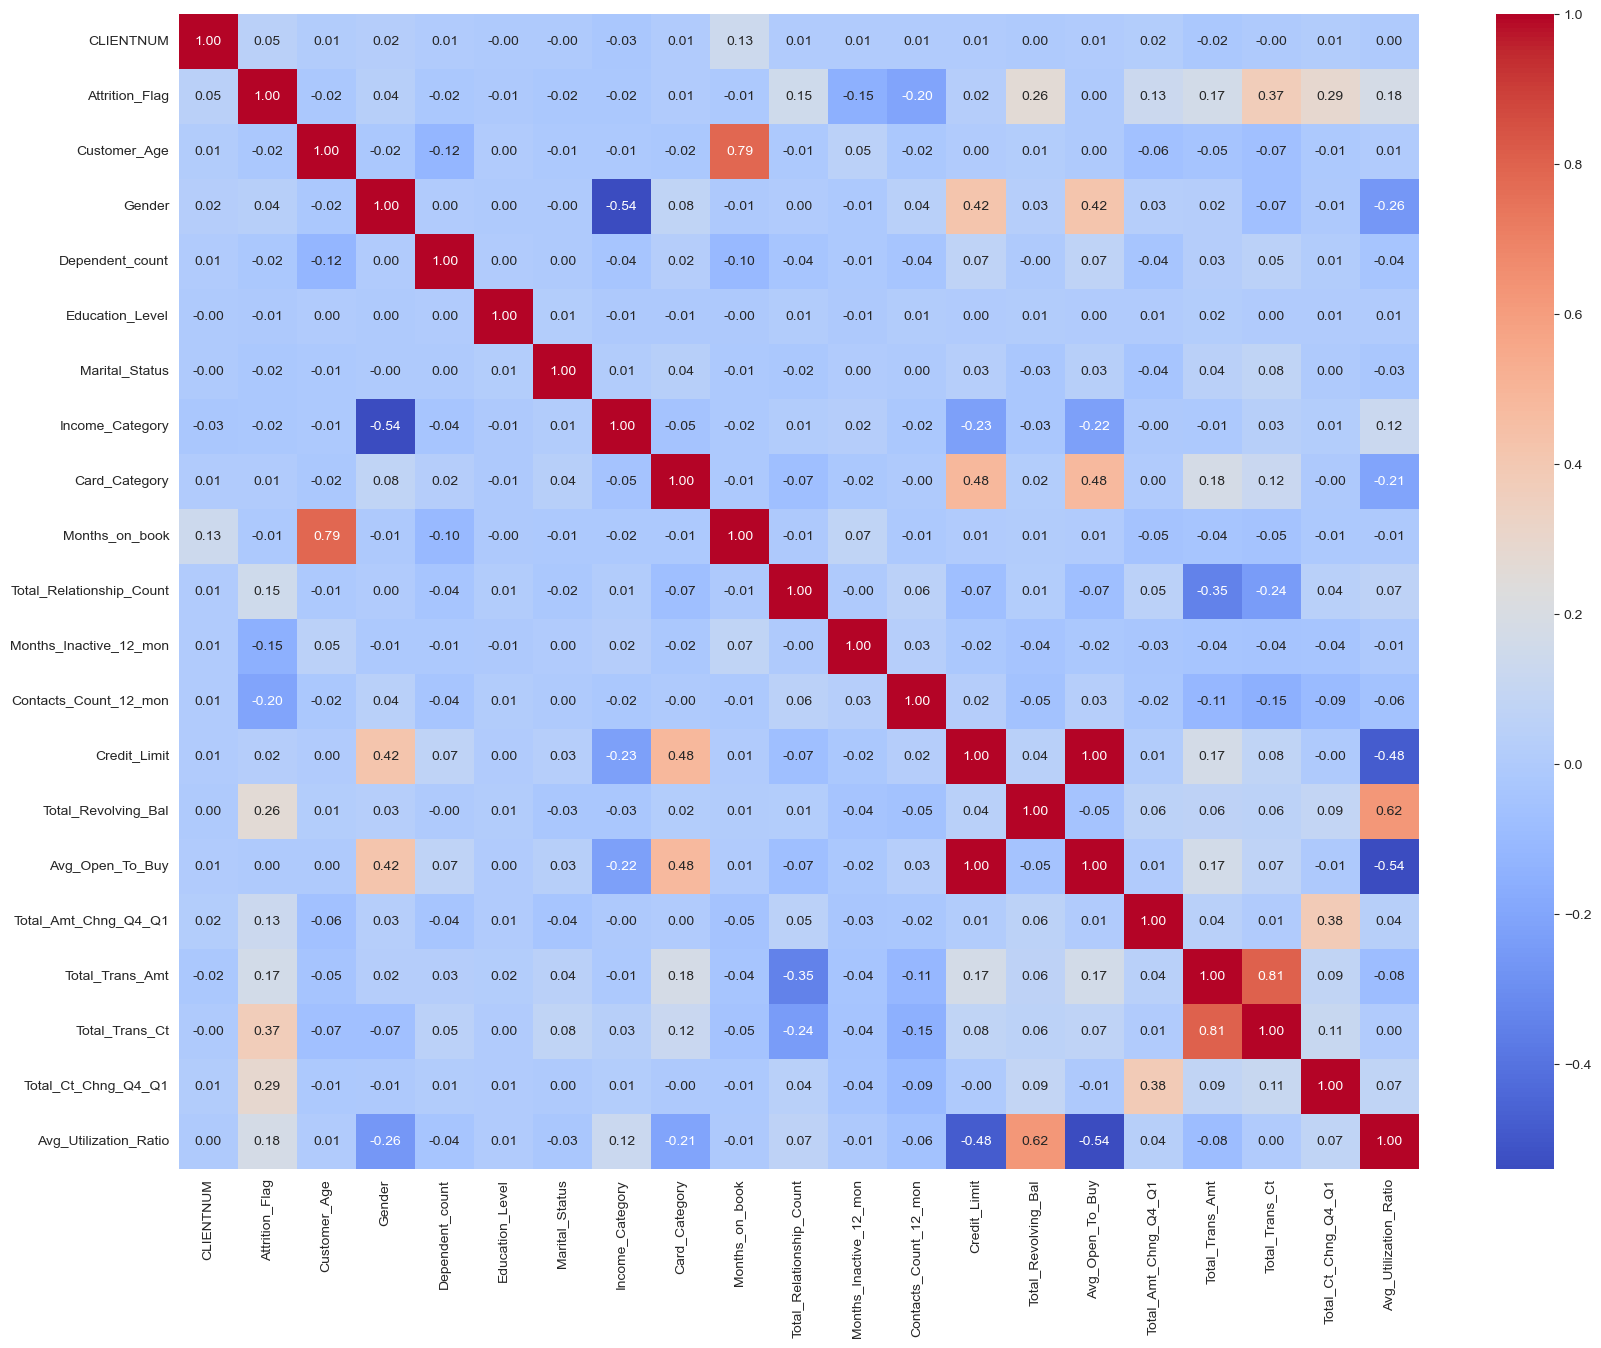

In [484]:
plt.figure(figsize=(20, 15))
sns.heatmap(creditcard_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [485]:
Xacc = loanFraud_dataset.drop(['IsFraud'], axis=1)
Yacc = loanFraud_dataset['IsFraud']

Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

In [486]:
sc = StandardScaler()
Xacc_train = sc.fit_transform(Xacc_train)
Xacc_test = sc.transform(Xacc_test)
#print(Xacc_train)

LogReg = linear_model.LogisticRegression()
DTClassifier = DecisionTreeClassifier()
RFClassifier = RandomForestClassifier()
SVMClassifier = SVC()
KNNClassifier = KNeighborsClassifier()
GBClassifier = GradientBoostingClassifier()
XGBClassifier = XGBClassifier()

LogReg.fit(Xacc_train, Yacc_train)
Yacc_log = LogReg.predict(Xacc_test)
DTClassifier.fit(Xacc_train, Yacc_train)
Yacc_dt = DTClassifier.predict(Xacc_test)
RFClassifier.fit(Xacc_train, Yacc_train)
Yacc_rf = RFClassifier.predict(Xacc_test)
SVMClassifier.fit(Xacc_train, Yacc_train)
Yacc_svm = SVMClassifier.predict(Xacc_test)
KNNClassifier.fit(Xacc_train, Yacc_train)
Yacc_knn = KNNClassifier.predict(Xacc_test)
GBClassifier.fit(Xacc_train, Yacc_train)
Yacc_gb = GBClassifier.predict(Xacc_test)
# XGBClassifier.fit(Xacc_train, Yacc_train)
# Yacc_xgb = XGBClassifier.predict(Xacc_test)

In [487]:
DataFrame = pd.DataFrame({"Actual Fraud or Not": Yacc_test, 'Predicted Fraud or Not': Yacc_log})
DataFrame

,Actual Fraud or Not,Predicted Fraud or Not
DummyDate,,
2025-02-18 17:00:00,0,0
2024-06-09 10:00:00,0,0
2024-07-25 18:00:00,0,0
2024-06-10 22:00:00,0,0
2024-08-14 13:00:00,0,0
...,...,...
2024-08-07 17:00:00,1,1
2024-11-29 22:00:00,0,0
2025-01-09 08:00:00,1,1


In [488]:
Xacc_test_df = pd.DataFrame(Xacc_test)
Xacc_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.004909,-0.009164,0.004977,-0.004795,0.039143,0.006304,-0.015423,-0.021350,0.005112,0.004703,...,0.012044,-0.023860,0.010645,-0.001221,0.002489,0.025621,-0.006036,-0.002961,-0.011986,0.013299
std,0.972383,1.004272,0.991103,0.993243,0.983294,0.995756,0.983279,0.986064,0.993478,0.999378,...,1.016316,1.007035,1.016708,1.000897,1.006930,1.006763,0.995434,0.999017,0.998014,1.011059
min,-1.006569,-1.753656,-1.553678,-0.878183,-2.451285,-0.799498,-2.532399,-1.032326,-0.754475,-1.174524,...,-0.328551,-2.786647,-0.291147,-1.764315,-0.177582,-1.040287,-0.488589,-0.685544,-0.841517,-0.937628
25%,-1.006569,-0.741887,-0.365981,-0.878183,-0.706066,-0.799498,-0.683803,-0.858100,-0.630985,-1.082995,...,-0.328551,-1.121983,-0.291147,0.566792,-0.177582,-1.040287,-0.488589,-0.685544,-0.841517,-0.937628
50%,-0.221361,-0.134825,0.821717,-0.215689,-0.706066,-0.210997,0.401243,-0.306971,-0.173109,-0.076178,...,-0.328551,0.542680,-0.291147,0.566792,-0.177582,-0.142050,-0.488589,-0.685544,-0.841517,0.116225
75%,0.799409,0.674590,0.821717,0.446805,1.039154,0.200953,0.816507,0.536591,0.155467,0.930639,...,-0.328551,0.542680,-0.291147,0.566792,-0.177582,0.756187,-0.488589,1.458696,1.188331,0.116225
max,1.663138,1.888713,0.821717,1.771793,1.039154,3.425933,0.816507,2.313460,3.325477,1.479812,...,3.043670,0.542680,3.434687,0.566792,5.631188,1.654424,2.046712,1.458696,1.188331,2.223932


In [489]:
accuracy = accuracy_score(Yacc_test, Yacc_log) # Accuracy classification score
report = classification_report(Yacc_test, Yacc_log) # Build a text report showing the main classification metrics
conf_matrix = confusion_matrix(Yacc_test, Yacc_log) # Compute confusion matrix to evaluate the accuracy of a classification

print("Validation Accuracy:", accuracy) 
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Validation Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
 [[2161  146]
 [ 319  374]]


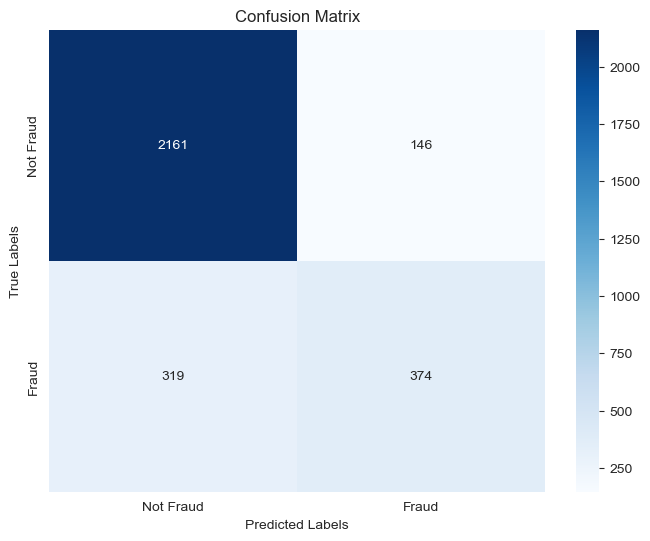

In [490]:
# Define labels for the heatmap
labels = ['Not Fraud', 'Fraud']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [491]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": Yacc_log,
    "Decision Tree": Yacc_dt,
    "Random Forest": Yacc_rf,
    "SVM": Yacc_svm,
    "KNN": Yacc_knn,
    "Gradient Boosting": Yacc_gb
}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(Yacc_test, y_pred)
    report = classification_report(Yacc_test, y_pred)
    conf_matrix = confusion_matrix(Yacc_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("=" * 50)  # Separator for better readability



Model: Logistic Regression
Validation Accuracy: 0.8450

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
 [[2161  146]
 [ 319  374]]

Model: Decision Tree
Validation Accuracy: 0.7660

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      2307
           1       0.49      0.52      0.50       693

    accuracy                           0.77      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.77      0.77      0.77      3000


Confusion Matrix:
 [[1941  366]
 [ 336  357]]

Model: Random Forest
Validation Accuracy: 0.8397

Classification Report:
               precisi

Resampling

Original distribution:
0    0.781
1    0.219
Name: IsFraud, dtype: float64

Undersampling distribution:
0    0.699294
1    0.300706
Name: IsFraud, dtype: float64

SMOTE distribution:
0    0.699373
1    0.300627
Name: IsFraud, dtype: float64

SMOTETomek distribution:
0    0.706069
1    0.293931
Name: IsFraud, dtype: float64

SMOTEENN distribution:
0    0.734278
1    0.265722
Name: IsFraud, dtype: float64


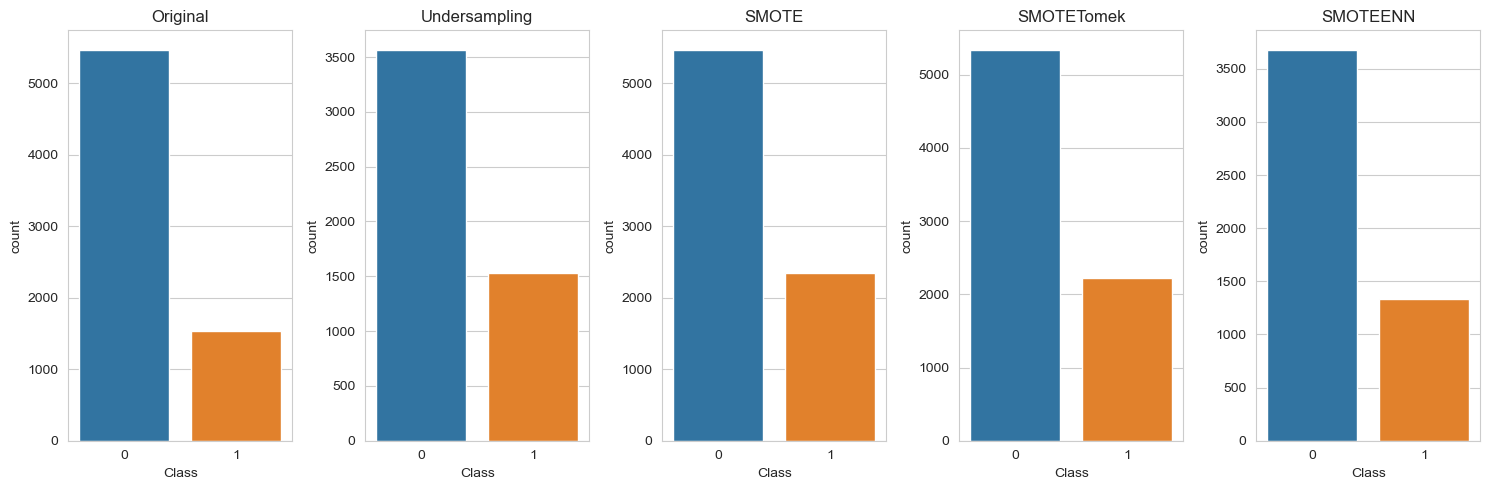

In [492]:
# 70/30 split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

sc = StandardScaler()
Xacc_train = sc.fit_transform(Xacc_train)
Xacc_test = sc.transform(Xacc_test)


# Resample only to the training data
# Setting sampling_strategy=0.43 will give roughly 70:30 ratio (non-fraud:fraud)

# 1. Undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.43, random_state=42)
X_under, y_under = undersampler.fit_resample(Xacc_train, Yacc_train)

# 2. SMOTE only
smote = SMOTE(sampling_strategy=0.43, random_state=42)
X_smote, y_smote = smote.fit_resample(Xacc_train, Yacc_train)

# 3. SMOTETomek (SMOTE + Tomek Links)
smotetomek = SMOTETomek(sampling_strategy=0.43, random_state=42)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(Xacc_train, Yacc_train)

# 4. SMOTEENN (SMOTE + Edited Nearest Neighbors)
smoteenn = SMOTEENN(sampling_strategy=0.43, random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(Xacc_train, Yacc_train)

# Print distributions for comparison
print("Original distribution:")
print(pd.Series(Yacc_train).value_counts(normalize=True))
print("\nUndersampling distribution:")
print(pd.Series(y_under).value_counts(normalize=True))
print("\nSMOTE distribution:")
print(pd.Series(y_smote).value_counts(normalize=True))
print("\nSMOTETomek distribution:")
print(pd.Series(y_smotetomek).value_counts(normalize=True))
print("\nSMOTEENN distribution:")
print(pd.Series(y_smoteenn).value_counts(normalize=True))

# Visualize distributions
plt.figure(figsize=(15, 5))

# Create DataFrames for each distribution to be plotted
df_original = pd.DataFrame({'Class': Yacc_train})
df_under = pd.DataFrame({'Class': y_under})
df_smote = pd.DataFrame({'Class': y_smote})
df_smotetomek = pd.DataFrame({'Class': y_smotetomek})
df_smoteenn = pd.DataFrame({'Class': y_smoteenn})

# Original
plt.subplot(151)
sns.countplot(data=df_original, x='Class')
plt.title('Original')

# Undersampling
plt.subplot(152)
sns.countplot(data=df_under, x='Class')
plt.title('Undersampling')

# SMOTE
plt.subplot(153)
sns.countplot(data=df_smote, x='Class')
plt.title('SMOTE')

# SMOTETomek
plt.subplot(154)
sns.countplot(data=df_smotetomek, x='Class')
plt.title('SMOTETomek')

# SMOTEENN
plt.subplot(155)
sns.countplot(data=df_smoteenn, x='Class')
plt.title('SMOTEENN')

plt.tight_layout()
plt.show()

In [493]:
resampled_sets = {
    'Original': (Xacc_train, Yacc_train),
    'Undersampling': (X_under, y_under),
    'SMOTE': (X_smote, y_smote),
    'SMOTETomek': (X_smotetomek, y_smotetomek),
    'SMOTEENN': (X_smoteenn, y_smoteenn)
}

for resample_name, (X_res, y_res) in resampled_sets.items():
    print(f"\nResults for {resample_name}:")
    # Train
    LogReg.fit(X_res, y_res)
    # Predict
    y_pred = LogReg.predict(Xacc_test)
    # Get accuracy
    acc = accuracy_score(Yacc_test, y_pred)
    print(f"{LogReg} Accuracy: {acc:.3f}")
    print(classification_report(Yacc_test, y_pred))


Results for Original:
LogisticRegression() Accuracy: 0.845
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Results for Undersampling:
LogisticRegression() Accuracy: 0.837
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2307
           1       0.64      0.66      0.65       693

    accuracy                           0.84      3000
   macro avg       0.77      0.78      0.77      3000
weighted avg       0.84      0.84      0.84      3000


Results for SMOTE:
LogisticRegression() Accuracy: 0.839
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2307
           1       0.65      0.67      0.66       693



Original distribution:
0    0.781
1    0.219
Name: IsFraud, dtype: float64

Undersampling distribution:
0    0.5
1    0.5
Name: IsFraud, dtype: float64

SMOTE distribution:
1    0.5
0    0.5
Name: IsFraud, dtype: float64

SMOTETomek distribution:
1    0.5
0    0.5
Name: IsFraud, dtype: float64

SMOTEENN distribution:
1    0.602848
0    0.397152
Name: IsFraud, dtype: float64


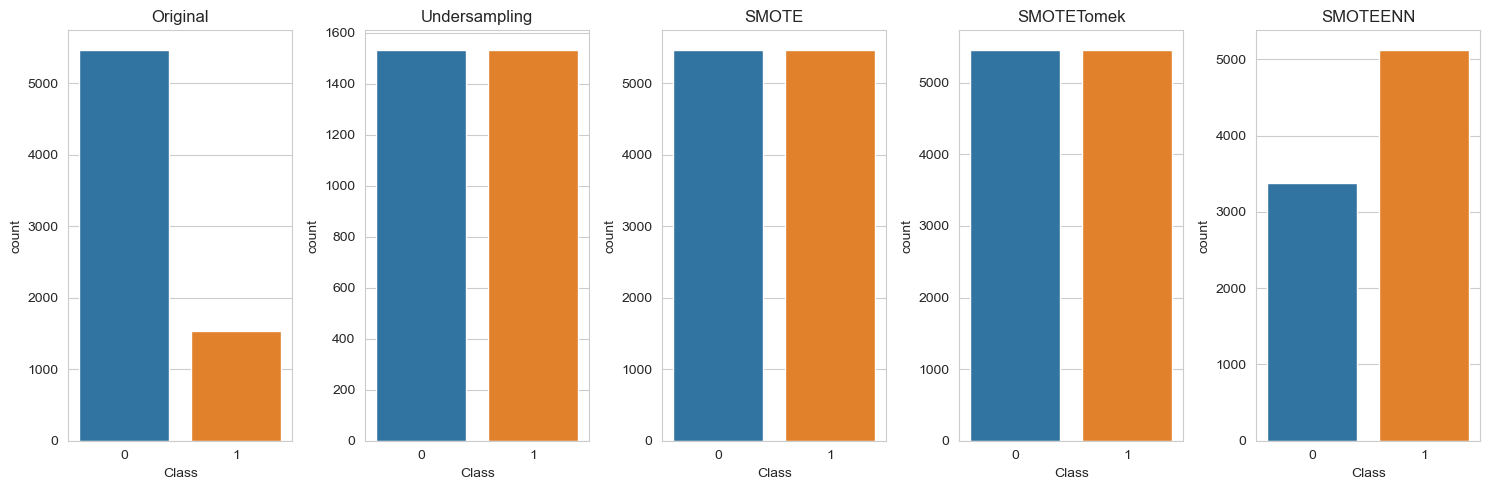

In [494]:
# 50/50 split
Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

sc = StandardScaler()
Xacc_train = sc.fit_transform(Xacc_train)
Xacc_test = sc.transform(Xacc_test)


# Resample only to the training data
# Setting sampling_strategy=1.0 will give 50:50 ratio (non-fraud:fraud)

# 1. Undersampling
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_under, y_under = undersampler.fit_resample(Xacc_train, Yacc_train)

# 2. SMOTE only
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_smote, y_smote = smote.fit_resample(Xacc_train, Yacc_train)

# 3. SMOTETomek (SMOTE + Tomek Links)
smotetomek = SMOTETomek(sampling_strategy=1.0, random_state=42)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(Xacc_train, Yacc_train)

# 4. SMOTEENN (SMOTE + Edited Nearest Neighbors)
smoteenn = SMOTEENN(sampling_strategy=1.0, random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(Xacc_train, Yacc_train)

# Print distributions for comparison
print("Original distribution:")
print(pd.Series(Yacc_train).value_counts(normalize=True))
print("\nUndersampling distribution:")
print(pd.Series(y_under).value_counts(normalize=True))
print("\nSMOTE distribution:")
print(pd.Series(y_smote).value_counts(normalize=True))
print("\nSMOTETomek distribution:")
print(pd.Series(y_smotetomek).value_counts(normalize=True))
print("\nSMOTEENN distribution:")
print(pd.Series(y_smoteenn).value_counts(normalize=True))

# Visualize distributions
plt.figure(figsize=(15, 5))

# Create DataFrames for each distribution to be plotted
df_original = pd.DataFrame({'Class': Yacc_train})
df_under = pd.DataFrame({'Class': y_under})
df_smote = pd.DataFrame({'Class': y_smote})
df_smotetomek = pd.DataFrame({'Class': y_smotetomek})
df_smoteenn = pd.DataFrame({'Class': y_smoteenn})

# Original
plt.subplot(151)
sns.countplot(data=df_original, x='Class')
plt.title('Original')

# Undersampling
plt.subplot(152)
sns.countplot(data=df_under, x='Class')
plt.title('Undersampling')

# SMOTE
plt.subplot(153)
sns.countplot(data=df_smote, x='Class')
plt.title('SMOTE')

# SMOTETomek
plt.subplot(154)
sns.countplot(data=df_smotetomek, x='Class')
plt.title('SMOTETomek')

# SMOTEENN
plt.subplot(155)
sns.countplot(data=df_smoteenn, x='Class')
plt.title('SMOTEENN')

plt.tight_layout()
plt.show()

In [495]:
resampled_sets = {
    'Original': (Xacc_train, Yacc_train),
    'Undersampling': (X_under, y_under),
    'SMOTE': (X_smote, y_smote),
    'SMOTETomek': (X_smotetomek, y_smotetomek),
    'SMOTEENN': (X_smoteenn, y_smoteenn)
}

for resample_name, (X_res, y_res) in resampled_sets.items():
    print(f"\nResults for {resample_name}:")
    # Train
    LogReg.fit(X_res, y_res)
    # Predict
    y_pred = LogReg.predict(Xacc_test)
    # Get accuracy
    acc = accuracy_score(Yacc_test, y_pred)
    print(f"{LogReg} Accuracy: {acc:.3f}")
    print(classification_report(Yacc_test, y_pred))


Results for Original:
LogisticRegression() Accuracy: 0.845
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Results for Undersampling:
LogisticRegression() Accuracy: 0.783
              precision    recall  f1-score   support

           0       0.93      0.77      0.85      2307
           1       0.52      0.82      0.63       693

    accuracy                           0.78      3000
   macro avg       0.73      0.80      0.74      3000
weighted avg       0.84      0.78      0.80      3000


Results for SMOTE:
LogisticRegression() Accuracy: 0.786
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2307
           1       0.52      0.81      0.64       693



Gradient Boosting Classification Model Code

Accuracy: 0.87
Classification Report:
[[5164  303]
 [ 583  950]]


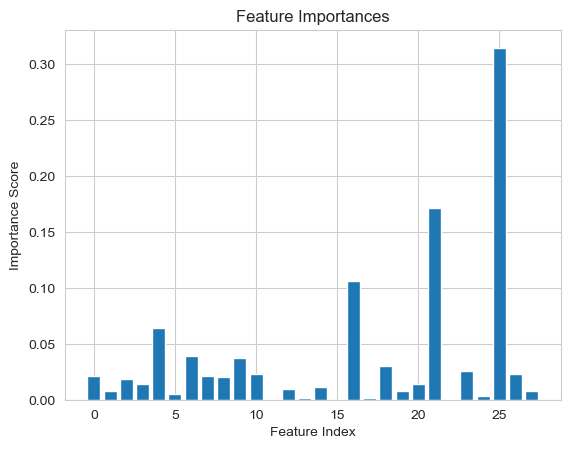

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Model Accuracy: 0.85


In [496]:
# Instantiate model
GBClassifier = GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1, max_depth= 3, random_state = 42)

GBClassifier.fit(Xacc_train, Yacc_train)
Yacc_gb = GBClassifier.predict(Xacc_train)

# For evaluating the model
accuracy = accuracy_score(Yacc_train, Yacc_gb)
print(f"Accuracy: {accuracy:.2f}")

#Classification Report
print("Classification Report:")
print(confusion_matrix(Yacc_train, Yacc_gb))

#Feature Importance
featureImportances = GBClassifier.feature_importances_
plt.bar(range(len(featureImportances)), featureImportances)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.show()

# HyperTuning
# parameters for GridSearchCV
paramGrid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
}

gridSearch = GridSearchCV(estimator=GBClassifier, param_grid=paramGrid, cv=3, scoring='accuracy', n_jobs=-1)
gridSearch.fit(Xacc_train, Yacc_train)

bestParams = gridSearch.best_params_
bestModel = gridSearch.best_estimator_

yPredBest = bestModel.predict(Xacc_test)
accuracyBest = accuracy_score(Yacc_test, yPredBest)
print("Best Parameters:", bestParams)
print(f"Best Model Accuracy: {accuracyBest:.2f}")

In [497]:
DTClassifier.fit(Xacc_train, Yacc_train)
Yacc_dt = DTClassifier.predict(Xacc_test)

Validation Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
 [[2161  146]
 [ 319  374]]


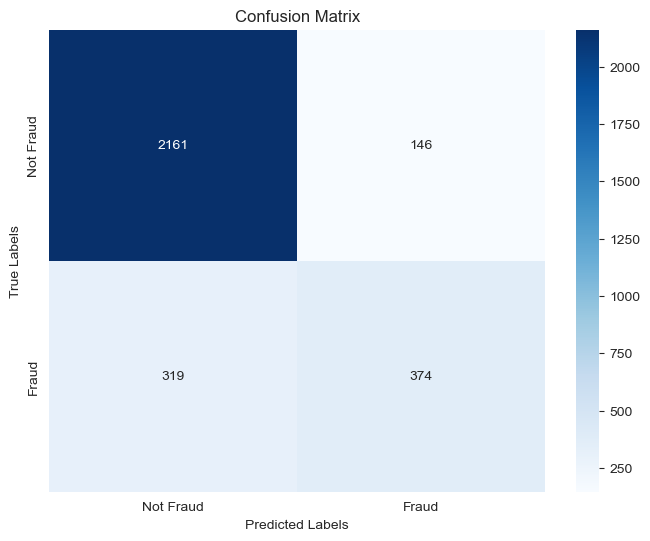

In [498]:
accuracy = accuracy_score(Yacc_test, Yacc_log) # Accuracy classification score
report = classification_report(Yacc_test, Yacc_log) # Build a text report showing the main classification metrics
conf_matrix = confusion_matrix(Yacc_test, Yacc_log) # Compute confusion matrix to evaluate the accuracy of a classification

print("Validation Accuracy:", accuracy) 
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

# Define labels for the heatmap
labels = ['Not Fraud', 'Fraud']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Data Visualization - Seaborn

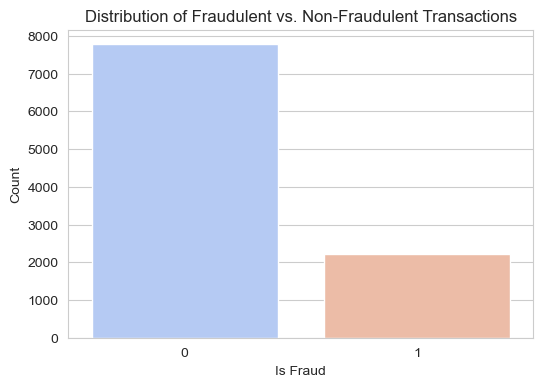

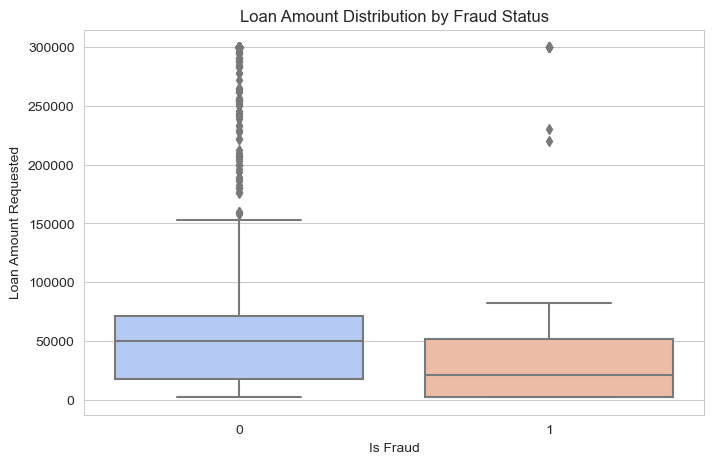

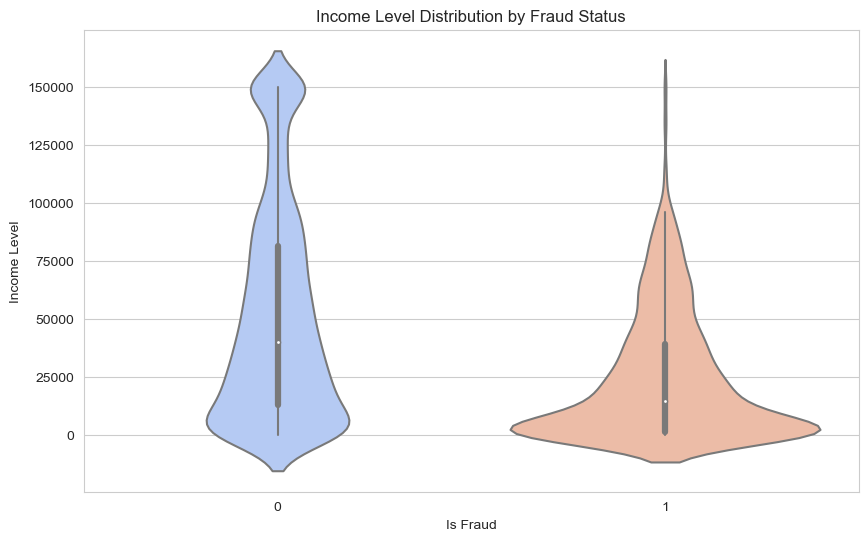

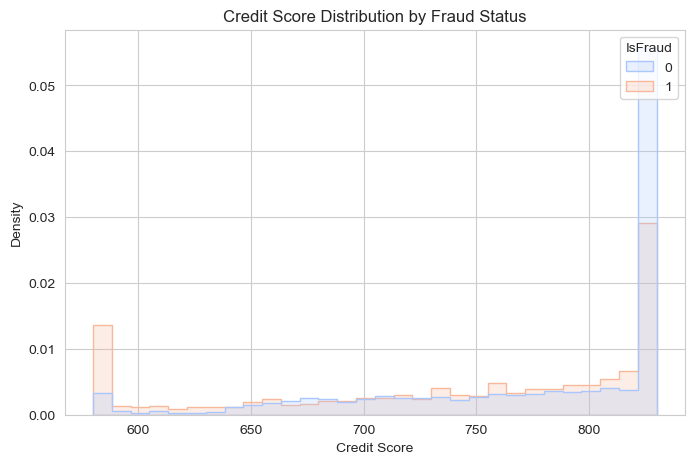

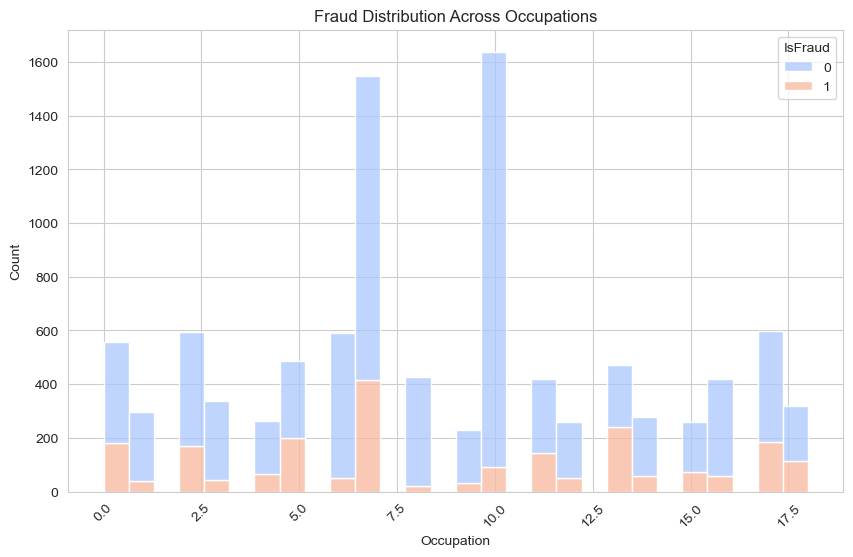

In [499]:
sns.set_style("whitegrid")

# fraud vs non-fraud
plt.figure(figsize=(6, 4))
sns.countplot(data=loanFraud_dataset, x='IsFraud', palette='coolwarm')
plt.title("Distribution of Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# loan amount distribution by fraud
plt.figure(figsize=(8, 5))
sns.boxplot(data=loanFraud_dataset, x='IsFraud', y='LoanAmountRequested', palette='coolwarm')
plt.title("Loan Amount Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Loan Amount Requested")
plt.show()

# income vs fraud status
plt.figure(figsize=(10, 6))
sns.violinplot(data=loanFraud_dataset, x='IsFraud', y='IncomeLevel', palette='coolwarm')
plt.title("Income Level Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Income Level")
plt.show()

# credit score vs fraud status
plt.figure(figsize=(8, 5))
sns.histplot(data=loanFraud_dataset, x='CreditScore', hue='IsFraud', element='step', stat='density', common_norm=False, palette='coolwarm', bins=30)
plt.title("Credit Score Distribution by Fraud Status")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=loanFraud_dataset, x='Occupation', hue='IsFraud', multiple="stack", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Fraud Distribution Across Occupations")
plt.show()

